In [2]:
import pandas as pd
import numpy as np

In [3]:
df_rsa_age = pd.read_csv('Neo_RSA_1028_All_spmT.csv')

# index_6 = df_rsa_age['Age_Round']==6
# index_7 = df_rsa_age['Age_Round']==7
# index_8 = df_rsa_age['Age_Round']==8
# index_9 = df_rsa_age['Age_Round']==9
# index_10 = df_rsa_age['Age_Round']==10
# index_11 = df_rsa_age['Age_Round']==11
# index_12 = df_rsa_age['Age_Round']==12

In [3]:
df_rsa_6  = df_rsa_age.loc[df_rsa_age['Age_Round']==6,  ['Scan_ID', 'Decision', 'Reward', 'Risk', 'Age_Continuous']]
df_rsa_7  = df_rsa_age.loc[df_rsa_age['Age_Round']==7,  ['Scan_ID', 'Decision', 'Reward', 'Risk', 'Age_Continuous']]
df_rsa_8  = df_rsa_age.loc[df_rsa_age['Age_Round']==8,  ['Scan_ID', 'Decision', 'Reward', 'Risk', 'Age_Continuous']]
df_rsa_9  = df_rsa_age.loc[df_rsa_age['Age_Round']==9,  ['Scan_ID', 'Decision', 'Reward', 'Risk', 'Age_Continuous']]
df_rsa_10 = df_rsa_age.loc[df_rsa_age['Age_Round']==10, ['Scan_ID', 'Decision', 'Reward', 'Risk', 'Age_Continuous']]
df_rsa_11 = df_rsa_age.loc[df_rsa_age['Age_Round']==11, ['Scan_ID', 'Decision', 'Reward', 'Risk', 'Age_Continuous']]
df_rsa_12 = df_rsa_age.loc[df_rsa_age['Age_Round']==12, ['Scan_ID', 'Decision', 'Reward', 'Risk', 'Age_Continuous']]

In [4]:
data_mat = df_rsa_age[['Decision', 'Reward', 'Risk', 'Age_Continuous', 'Age_Round']].to_numpy()

#### **Stratified Bootstrap Analysis for distribution of correlations btw RSA and ages**

In [5]:
import numpy as np

def stratified_bootstrap(ages, features, group_indices, num_samples_per_group, num_iterations=1000):
    """
    ages: numpy array of ages
    features: numpy array of corresponding features
    group_indices: a list of numpy arrays, where each array contains the indices of samples in that age group
    num_samples_per_group: number of samples to be taken from each group
    num_iterations: number of bootstrap iterations
    """
    r_values = []

    for _ in range(num_iterations):
        sampled_ages, sampled_features = [], []

        for indices in group_indices:
            # randomly extract n samples：
            selected_indices = np.random.choice(indices, num_samples_per_group, replace=True)  
            sampled_ages.extend(ages[selected_indices])
            sampled_features.extend(features[selected_indices])

        r_value = np.corrcoef(sampled_ages, sampled_features)[0, 1]
        r_values.append(r_value)

    return r_values


In [6]:
# Assuming ages are from 6 to 12, we first determine the indices of samples in each age group.
group_indices = [np.where(data_mat[:,-1] == i)[0] for i in range(7, 13)]


In [9]:
r_values_loss = stratified_bootstrap(data_mat[:,-2], data_mat[:,0], group_indices, num_samples_per_group=13, num_iterations=10000)

confidence_interval = [np.percentile(r_values_loss  , 2.5), np.percentile(r_values_loss  , 97.5)]
print(f"95% confidence interval for the r-value: {confidence_interval}")

95% confidence interval for the r-value: [-0.1427044376750899, 0.28268242936011556]


In [2]:
# visualize bootstrap results：Density plot for distribution of bootstrapped statstics values

def hist_bootstrap(r_values, bins=30, fcolor='C0', alpha=0.75, ecolor=None, CI_per=0.95, axes=None):
    
    import numpy as np
    import matplotlib.pyplot as plt

    # r_values are r list derived from stratified_bootstrap analysis
    # calculate CI of r_value
    confidence_interval = [
        np.percentile(r_values, 100*(0.5*(1-CI_per))), 
        np.percentile(r_values, 100*(CI_per+0.5*(1-CI_per)))
        ]
    
    if axes is None:
        # create histograms
        plt.hist(r_values, bins=bins, density=True, alpha=alpha, color=fcolor, edgecolor=ecolor)

        # add line marker indicating CI
        plt.axvline(
            confidence_interval[0], 
            color='red', linestyle='dashed', linewidth=1.5, 
            label=f'{round(100*(0.5*(1-CI_per)), 2)}% Percentile')
        plt.axvline(
            confidence_interval[1], 
            color='red', linestyle='dashed', linewidth=1.5, 
            label=f'{round(100*(CI_per+0.5*(1-CI_per)), 2)}% Percentile')

        # add legends and titles
        plt.legend()
        plt.title('Bootstrap Distribution of Correlation Coefficients')
        plt.xlabel('Correlation Coefficient (r)')
        plt.ylabel('Density')
    else:
        axes.hist(r_values, bins=bins, density=True, alpha=alpha, color=fcolor, edgecolor=ecolor)
        axes.axvline(
            confidence_interval[0], 
            color='red', linestyle='dashed', linewidth=1.5, 
            label=f'{round(100*(0.5*(1-CI_per)), 2)}% Percentile')
        axes.axvline(
            confidence_interval[1], 
            color='red', linestyle='dashed', linewidth=1.5, 
            label=f'{round(100*(CI_per+0.5*(1-CI_per)), 2)}% Percentile')

    # show plot
    # plt.tight_layout()
    # plt.show()


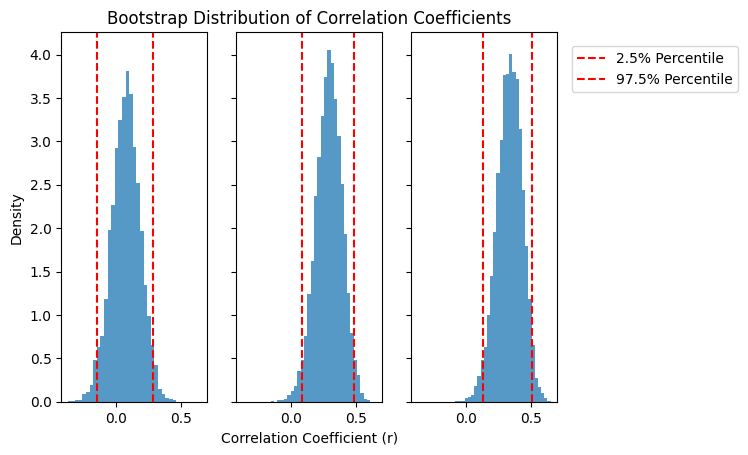

In [174]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, sharex=True, sharey=True)

hist_bootstrap(r_values_inflate , bins=30, alpha=0.75, CI_per=0.95, axes=axes[0])
hist_bootstrap(r_values_win ,     bins=30, alpha=0.75, CI_per=0.95, axes=axes[1])
hist_bootstrap(r_values_loss ,    bins=30, alpha=0.75, CI_per=0.95, axes=axes[2])
axes[1].set_title('Bootstrap Distribution of Correlation Coefficients')
axes[1].set_xlabel('Correlation Coefficient (r)')
axes[0].set_ylabel('Density')
axes[2].legend(loc='center left', bbox_to_anchor=(1.05, 0.9))

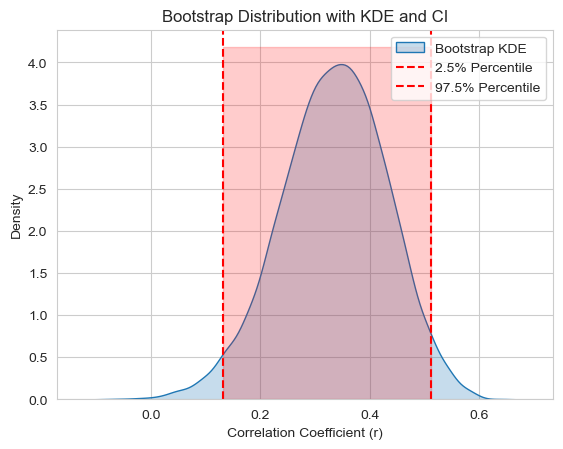

In [8]:
# visualize bootstrap results：KDE plot

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample bootstrap results
r_values = r_values_loss
confidence_interval = (np.percentile(r_values, 2.5), np.percentile(r_values, 97.5))

# Set the seaborn style
sns.set_style('whitegrid')

# Plot the KDE
sns.kdeplot(r_values, shade=True, color='C0', label='Bootstrap KDE')

# Add vertical lines for the confidence intervals
plt.axvline(confidence_interval[0], color='red', linestyle='dashed', label='2.5% Percentile')
plt.axvline(confidence_interval[1], color='red', linestyle='dashed', label='97.5% Percentile')

# Shade the confidence interval region
plt.fill_betweenx([0, plt.gca().get_ylim()[1]], confidence_interval[0], confidence_interval[1], color='red', alpha=0.2)

plt.legend(loc='upper right')
plt.xlabel('Correlation Coefficient (r)')
plt.ylabel('Density')
plt.title('Bootstrap Distribution with KDE and CI')
plt.show()


#### **Correlation Tables btw variables of interests**

- Behavior: 
  - adjusted pumps
  - total earnings
  - proportion of explosion
  - reaction time
  - 
- Brain:
  - 不同condition下的maturation index(仅儿童被试)
  - ROI 激活(可选择对应condition下结果显著的区域)
  - PPI功能连接(主要关注module/network水平上的within和between connectivity)

1. 使用括号中的主要结果；
2. 分被试呈现相关性结果(可以在一定程度上呈现组间的差异)；
3. 儿童被试maturation需要加入相关性表格中；
4. 是否需要将brain的结果放到behavior指标中一起计算相关性表格？

In [10]:
import pandas as pd
import seaborn as sns

df_behv = pd.read_csv('behavior_mi_age_adult_child.csv', )
df_behv_A = df_behv.loc[df_behv['Age_group']=='A', ['ave_adj pumps', 'percentage_exploded_balloons', 'total_win_balloons', 'ave_RT_all_pumps',
                                                    'Age_Continuous']]
df_behv_C = df_behv.loc[df_behv['Age_group']=='C', ['ave_adj pumps', 'percentage_exploded_balloons', 'total_win_balloons', 'ave_RT_all_pumps',
                                                    'MI_Decision', 'MI_Reward', 'MI_Risk', 'Age_Continuous']]

In [11]:
df_behv_A.rename(
    columns={
        'adjusted pumps': 'Adjusted pumps',
        'proportion of explosion': 'Proportion of explosion',
        'total earnings': 'Total earnings',
        'reaction time': 'Reaction time',
        'age': 'Age'},
    inplace=True)

df_behv_C.rename(
    columns={
        'adjusted pumps': 'Adjusted pumps',
        'proportion of explosion': 'Proportion of explosion',
        'total earnings': 'Total earnings',
        'reaction time': 'Reaction time',
        'age': 'Age'},
    inplace=True)

In [12]:
from scipy.stats import pearsonr

corr_behv_A = df_behv_A.corr()
corr_behv_C = df_behv_C.corr()
pval_behv_A = df_behv_A.apply(lambda x: df_behv_A.apply(lambda y: pearsonr(x, y)[1]))
pval_behv_C = df_behv_C.apply(lambda x: df_behv_C.apply(lambda y: pearsonr(x, y)[1]))

In [13]:
corr_behv_A.to_csv('corr_behv_adults.csv')
corr_behv_C.to_csv('corr_behv_children.csv')

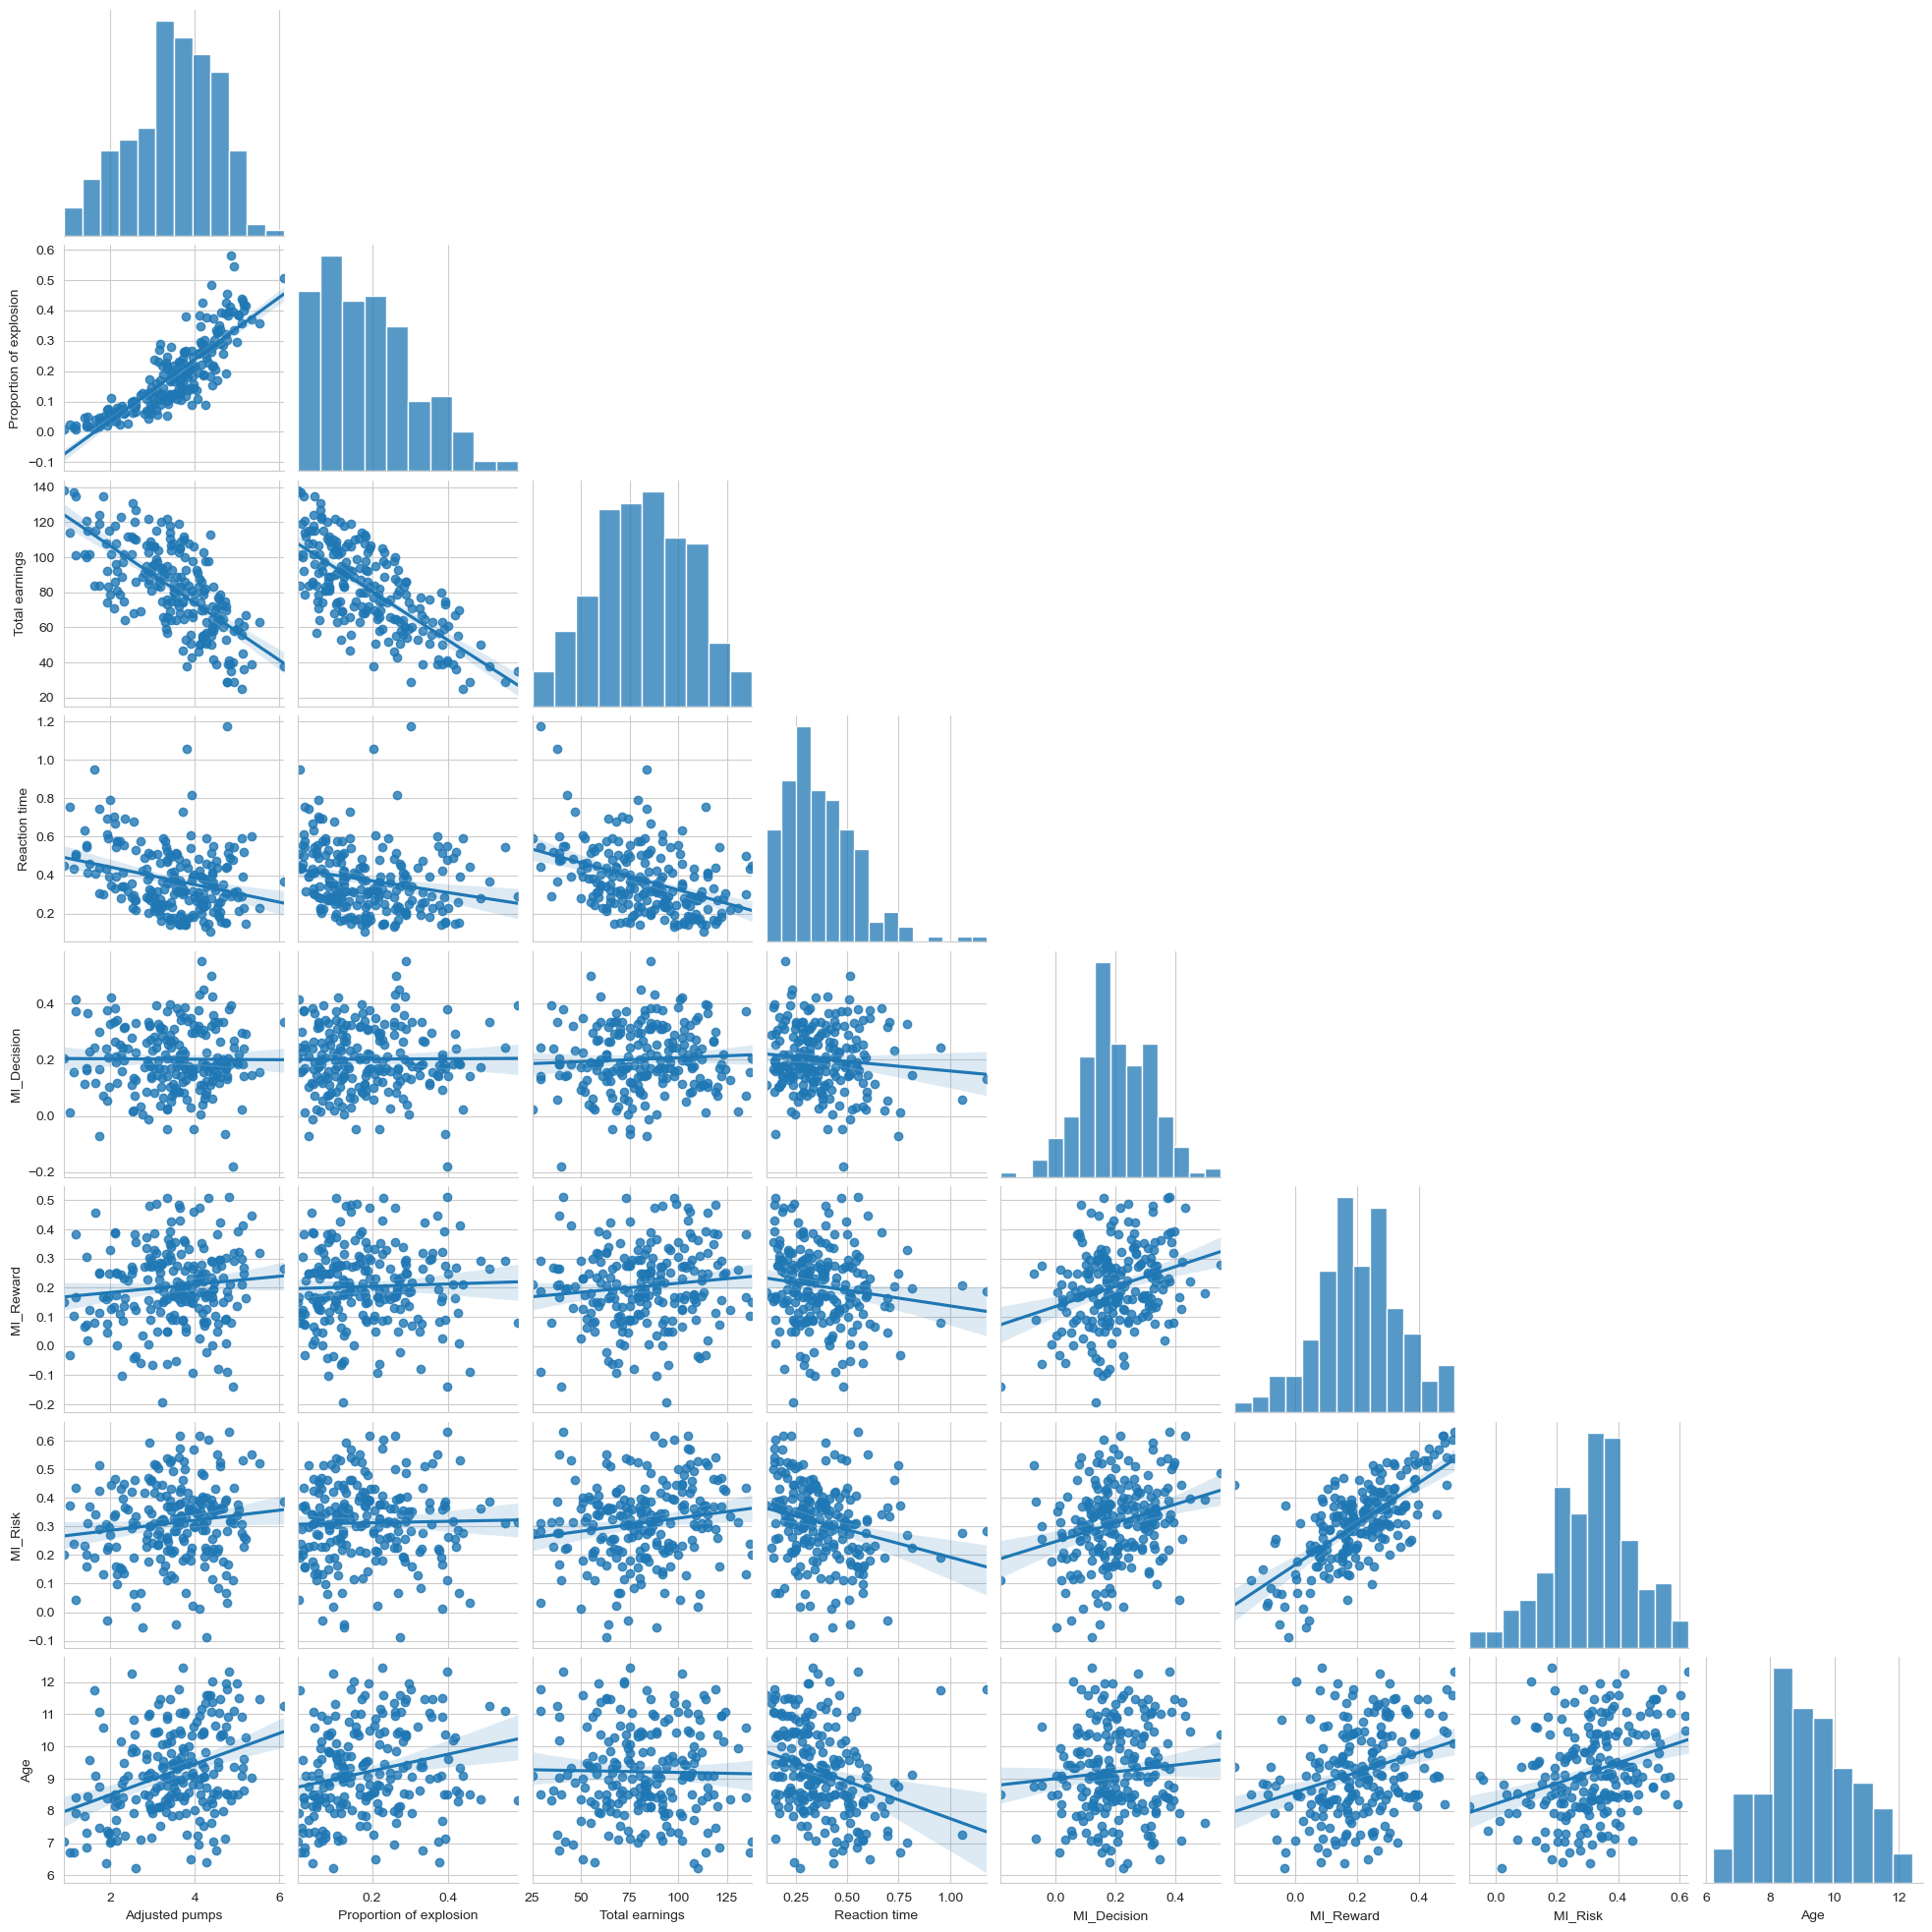

In [37]:
sns.pairplot(
    df_behv_C,
    # hue='Age',
    kind='reg',
    diag_kind='auto',
    corner=True)

<AxesSubplot:>

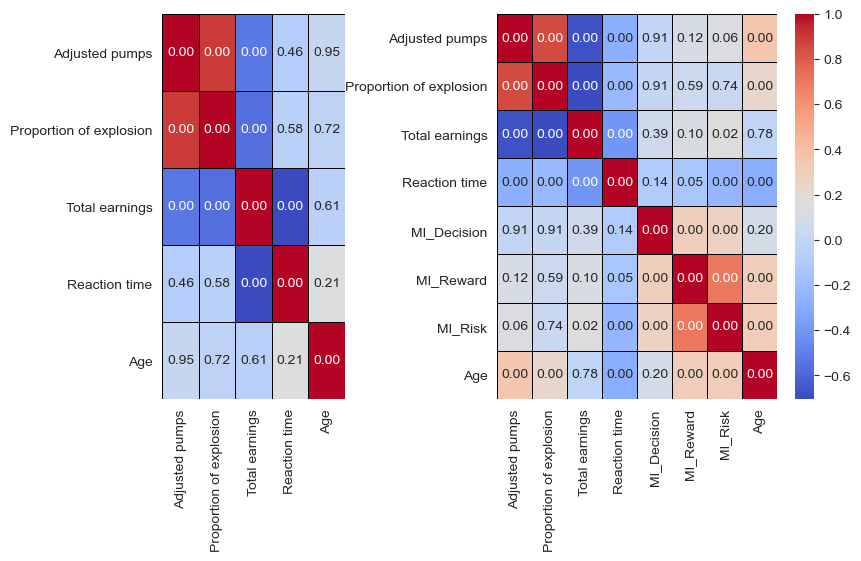

In [109]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1, 6)
plt.figure(figsize=(11, 5))
ax1 = plt.subplot(gs[:, 0:2])
ax2 = plt.subplot(gs[:, 2:-1])

# fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace=10, hspace=0.4)

sns.heatmap(
    corr_behv_A, ax=ax1, 
    cmap='coolwarm',
    cbar=False, 
    # square=True,
    linewidths=0.5,
    linecolor='black',
    annot=pval_behv_A,
    fmt='.2f',
    )
sns.heatmap(
    corr_behv_C, ax=ax2, 
    cmap='coolwarm',
    cbar=True,
    # square=True,
    linewidths=0.5,
    linecolor='black',
    annot=pval_behv_C,
    fmt='.2f',
    )

In [ ]:
from scipy.stats import pearsonr

df_behv_A = df_behv.loc[df_behv['Age_group']=='A', ['ave_adj pumps', 'percentage_exploded_balloons', 'total_win_balloons', 'ave_RT_all_pumps',
                                                    'Age_Continuous']]
df_behv_C = df_behv.loc[df_behv['Age_group']=='C', ['ave_adj pumps', 'percentage_exploded_balloons', 'total_win_balloons', 'ave_RT_all_pumps',
                                                    'Age_Continuous']]


corr_behv_A = df_behv_A.corr()
corr_behv_C = df_behv_C.corr()
pval_behv_A = df_behv_A.apply(lambda x: df_behv_A.apply(lambda y: pearsonr(x, y)[1]))
pval_behv_C = df_behv_C.apply(lambda x: df_behv_C.apply(lambda y: pearsonr(x, y)[1]))

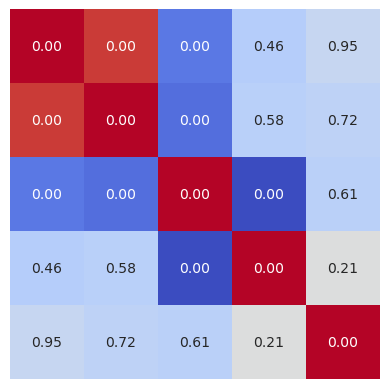

In [75]:
import seaborn as sns

# fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
# plt.subplots_adjust(wspace=0.1, hspace=0.4)

hp_corr_adt = sns.heatmap(
    corr_behv_A, #ax=ax1, 
    cmap='coolwarm',
    robust=True,
    cbar=False, 
    square=True,
    # linewidths=0.5,
    # linecolor='black',
    annot=pval_behv_A,
    fmt='.2f',
    xticklabels=False,
    yticklabels=False,
    )

hp_corr_chi.get_figure().savefig('heatmap_corr_chi_behv.png', dpi=300)

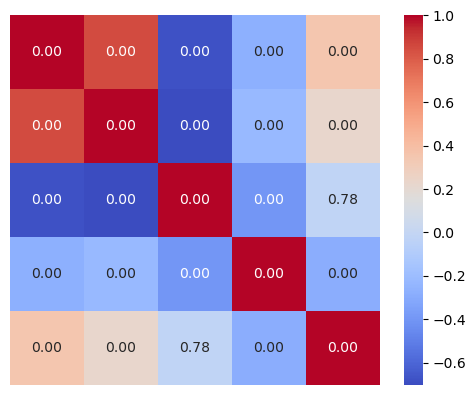

In [74]:
hp_corr_chi = sns.heatmap(
    corr_behv_C, #ax=ax2, 
    cmap='coolwarm',
    robust=True,
    cbar=True,
    square=True,
    # linewidths=0.5,
    # linecolor='black',
    annot=pval_behv_C,
    fmt='.2f',
    xticklabels=False,
    yticklabels=False,
    )

hp_corr_adt.get_figure().savefig('heatmap_corr_adt_behv.png', dpi=300)

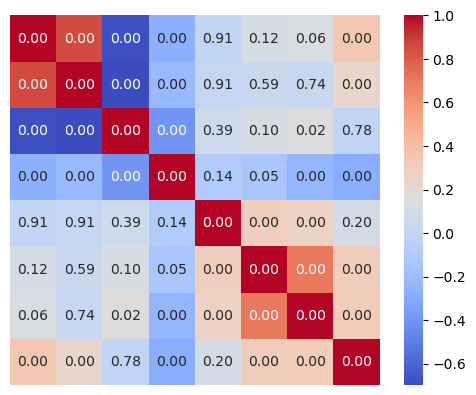

In [79]:
from scipy.stats import pearsonr

df_behv_C = df_behv.loc[df_behv['Age_group']=='C', ['ave_adj pumps', 'percentage_exploded_balloons', 'total_win_balloons', 'ave_RT_all_pumps',
                                                    'MI_Decision', 'MI_Reward', 'MI_Risk', 'Age_Continuous']]

corr_behv_C = df_behv_C.corr()
pval_behv_C = df_behv_C.apply(lambda x: df_behv_C.apply(lambda y: pearsonr(x, y)[1]))

hp_corr_chi_MIs = sns.heatmap(
    corr_behv_C, #ax=ax2, 
    cmap='coolwarm',
    robust=True,
    cbar=True,
    square=True,
    # linewidths=0.5,
    # linecolor='black',
    annot=pval_behv_C,
    fmt='.2f',
    xticklabels=False,
    yticklabels=False,
    )

hp_corr_chi_MIs.get_figure().savefig('heatmap_corr_chi_behv_MIs.png', dpi=300)